In [120]:
#importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("bmh")

In [121]:
#dataset foi pego no kaggle, link: https://www.kaggle.com/datasets/whenamancodes/students-performance-in-exams

# Features:
# gender = gênero
# race/ethnicity = raça/etnia 
# parental level of education = nível de escolaridade dos pais
# lunch = almoço
# test preparation course	= curso preparatório para teste
# math score = pontuação de matemática
# reading score = pontuação de leitura
# writing score = pontuaçao de escrita

In [122]:
#importando os dados
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Analise Exploratória/exams.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [123]:
#verificando o tamanho do dataframe
df.shape

(1000, 8)

In [124]:
#detalhes sobre o dataframe
df.describe()

,math score,reading score,writing score
count,"1,000.00","1,000.00","1,000.00"
mean,66.40,69.00,67.74
std,15.40,14.74,15.60
min,13.00,27.00,23.00
25%,56.00,60.00,58.00
50%,66.50,70.00,68.00
75%,77.00,79.00,79.00
max,100.00,100.00,100.00


In [125]:
#Verificando se temos dados faltantes
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [126]:
#Verificando se temos dados duplicados
df.duplicated().sum()

1

In [127]:
#Retirando os dados duplicados
df = df.drop_duplicates()

In [128]:
#Verificando se foi retirado os dados duplicados
df.duplicated().sum()

0

In [129]:
#Verificando os tipos de dados
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [130]:
#Média de matematica entre generos
df.groupby('gender')["math score"].mean()

gender
female                  63.20
male                    69.33
Name: math score, dtype: float64

In [131]:
#Média de leitura entre generos
df.groupby('gender')["reading score"].mean()

gender
female                  71.89
male                    66.24
Name: reading score, dtype: float64

In [132]:
#Média de escrita entre generos
df.groupby('gender')["writing score"].mean()

gender
female                  71.71
male                    63.96
Name: writing score, dtype: float64

In [133]:
#configurando o float para o numero de casas que será exibido
pd.options.display.float_format = '{:20,.2f}'.format

In [135]:
#Criando uma coluna nova com a média total de pontuação
df['total average score'] = (df["math score"] + df["reading score"] + df['writing score'])/3
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total average score
0,male,group A,high school,standard,completed,67,67,63,65.67
1,female,group D,some high school,free/reduced,none,40,59,55,51.33
2,male,group E,some college,free/reduced,none,59,60,50,56.33
3,male,group B,high school,standard,none,77,78,68,74.33
4,male,group E,associate's degree,standard,completed,78,73,68,73.00
...,...,...,...,...,...,...,...,...,...
995,male,group C,high school,standard,none,73,70,65,69.33
996,male,group D,associate's degree,free/reduced,completed,85,91,92,89.33
997,female,group C,some high school,free/reduced,none,32,35,41,36.00
998,female,group C,some college,standard,none,73,74,82,76.33


In [136]:
#Média total entre generos
df.groupby('gender')["total average score"].mean()

gender
female                  68.93
male                    66.51
Name: total average score, dtype: float64

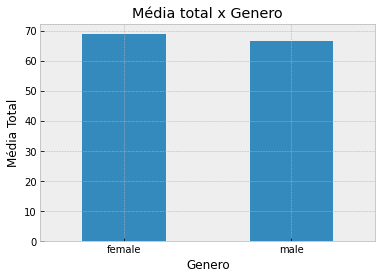

In [137]:
#Gráfico de barras
df.groupby('gender')["total average score"].mean().plot.bar(title="Média total x Genero")
plt.xlabel("Genero")
plt.ylabel("Média Total")
plt.xticks(rotation='horizontal');

In [138]:
#Média total entre raças
df.groupby('race/ethnicity')["total average score"].mean()

race/ethnicity
group A                  66.92
group B                  65.34
group C                  64.68
group D                  71.20
group E                  72.19
Name: total average score, dtype: float64

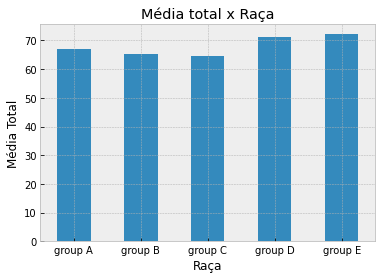

In [139]:
#Gráfico de barras
df.groupby('race/ethnicity')["total average score"].mean().plot.bar(title="Média total x Raça")
plt.xlabel("Raça")
plt.ylabel("Média Total")
plt.xticks(rotation='horizontal');

In [140]:
#Média total entre pessoas que já terminaram o curso preparatório
df.groupby('test preparation course')["total average score"].mean()

test preparation course
completed                  72.73
none                       65.14
Name: total average score, dtype: float64

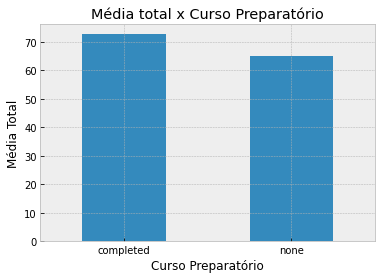

In [141]:
#Gráfico de barras
df.groupby('test preparation course')["total average score"].mean().plot.bar(title="Média total x Curso Preparatório")
plt.xlabel("Curso Preparatório")
plt.ylabel("Média Total")
plt.xticks(rotation='horizontal');

In [142]:
#verificando as pessoas que tiveram nota total igual a 95
filtro = df['total average score'] >= 95
df_95 = df[filtro]
df_95

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total average score
96,female,group E,associate's degree,standard,completed,95,100,100,98.33
148,female,group E,bachelor's degree,standard,completed,100,100,100,100.00
185,female,group C,master's degree,standard,none,91,100,99,96.67
224,male,group D,bachelor's degree,standard,none,99,94,97,96.67
273,female,group E,high school,standard,none,93,100,93,95.33
281,male,group E,associate's degree,standard,completed,100,100,100,100.00
396,female,group D,associate's degree,standard,none,85,100,100,95.00
441,female,group C,master's degree,standard,completed,86,100,100,95.33
485,male,group B,master's degree,standard,none,93,96,96,95.00
550,female,group E,some college,standard,completed,100,100,100,100.00


In [143]:
#Média total entre pessoas de acordo com o nível de escolaridade dos pais
df.groupby('parental level of education')["total average score"].mean()

parental level of education
associate's degree                  70.06
bachelor's degree                   73.30
high school                         65.82
master's degree                     74.30
some college                        66.69
some high school                    62.55
Name: total average score, dtype: float64

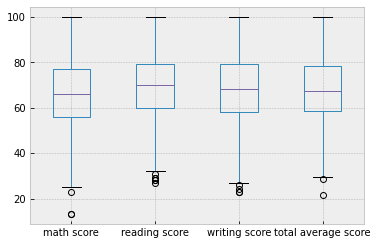

In [144]:
#Gráfico de Boxplot
df.boxplot(column=["math score","reading score","writing score","total average score"]);